# Import 

In [29]:
import pandas as pd
import boto3
import gzip
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

AWS_REGION = 'us-east-1'
ROW_LIMIT = 10000

session = boto3.Session(profile_name='kranio')
s3 = session.client('s3')

In [30]:
bucket = "kranio-datalake"
key = "internal/webinar/leoCamilo/raw/complaints.csv"

obj = s3.get_object(Bucket=bucket, Key=key)
obj = BytesIO(obj['Body'].read())

complaints_df = pd.read_csv(obj)

# Exploratory analysis

In [50]:
complaints_tickets_df = complaints_df[['Date','Status','Ticket #']]
ticket_grouped_df = complaints_tickets_df.groupby(['Date','Status'], as_index=False).count()
ticket_grouped_df = ticket_grouped_df.sort_values(by=['Ticket #'], ascending=False)
ticket_grouped_df = ticket_grouped_df.rename(columns={'Ticket #': 'Ticket Count'})
ticket_grouped_df.head()

,Date,Status,Ticket Count
186,6/24/2015,Solved,127
182,6/23/2015,Solved,121
191,6/25/2015,Solved,71
184,6/24/2015,Open,54
180,6/23/2015,Open,35


In [51]:
ticket_open_idx = ticket_grouped_df["Status"]=='Open'
ticket_open_df = ticket_grouped_df[ticket_open_idx]
ticket_open_df.head()

,Date,Status,Ticket Count
184,6/24/2015,Open,54
180,6/23/2015,Open,35
212,6/30/2015,Open,18
189,6/25/2015,Open,18
159,6/18/2015,Open,15


In [52]:
ticket_closed_idx = ticket_grouped_df["Status"]=='Closed'
ticket_closed_df = ticket_grouped_df[ticket_closed_idx]
ticket_closed_df.head()

,Date,Status,Ticket Count
40,4/8/2015,Closed,28
30,4/28/2015,Closed,26
13,4/2/2015,Closed,26
39,4/7/2015,Closed,25
29,4/27/2015,Closed,25


# Tickets by date

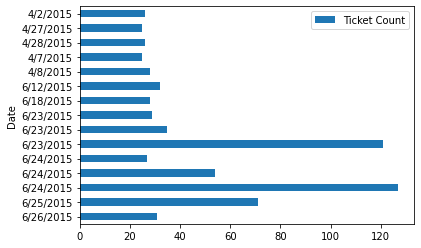

In [64]:
tmp_df = ticket_grouped_df.head(15)
tmp_df = tmp_df.set_index('Date')
tmp_df = tmp_df.sort_values(by=['Date'], ascending=False)
tmp_df.plot(kind="barh")

# ticket status distribution


In [68]:
complaints_tickets_df[['Status', 'Ticket #']].groupby(['Status'], as_index=False).count()

,Status,Ticket #
0,Closed,734
1,Open,363
2,Pending,155
3,Solved,973


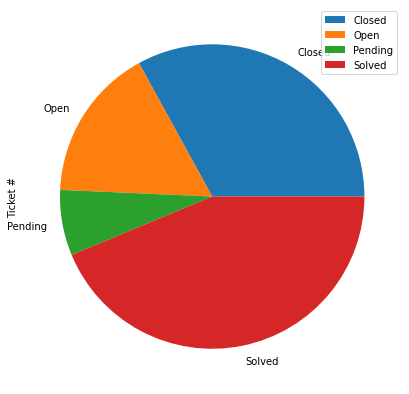

In [71]:
tmp_df = complaints_tickets_df[['Status', 'Ticket #']].groupby(['Status'], as_index=False).count()
tmp_df = tmp_df.set_index('Status')
tmp_df.plot.pie(y='Ticket #', figsize=(7, 7))